In [9]:
import os
import shutil

import pandas as pd
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
import tensorflow_text as text
import keras

from keras import Input
from keras.layers import TextVectorization
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import (
    GRU,
    Conv1D,
    Dense,
    Embedding,
    Flatten,
    Lambda,
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

print(tf.__version__)

2.11.0


In [12]:
bert_model = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2")
# preprocess = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

In [11]:
bert_preprocess_model = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# preprocess = hub.load

In [14]:
#read data
data = pd.read_csv("../data/train.csv")
#shuffle data
data = data.sample(frac=1)

In [ ]:
    # text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
    # preprocessing_layer = hub.KerasLayer(
    #     tfhub_handle_preprocess, name="preprocessing"
    # )
    # encoder_inputs = preprocessing_layer(text_input)
    # encoder = hub.KerasLayer(
    #     tfhub_handle_encoder, trainable=True, name="BERT_encoder"
    # )
    # outputs = encoder(encoder_inputs)
    # net = outputs["pooled_output"]
    # net = tf.keras.layers.Dropout(dropout_rate)(net)
    # net = tf.keras.layers.Dense(1, activation=None, name="classifier")(net)

In [27]:
BATCHSIZE = 50

inputs = Input(shape=(),dtype=tf.string,name="InputString")
x = bert_model(bert_preprocess_model(inputs))
# x = Dense(256,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.005))(x["pooled_output"])
# x = tf.keras.layers.Dropout(0.2)(x)
x = GRU(16)(x["sequence_output"])
# x = inputs
outputs = Dense(1,activation="sigmoid")(x)

model = keras.Model(inputs=inputs,outputs=outputs,name="modeltest")
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="binary_crossentropy",metrics=["Accuracy"])

Model: "modeltest"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputString (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 keras_layer_3 (KerasLayer)     {'input_mask': (Non  0           ['InputString[0][0]']            
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                              

In [ ]:
modelhistory = model.fit(
    data.text,
    data.target, 
    epochs=50,
    batch_size=BATCHSIZE, 
    validation_split=0.2
    # validation_data=(data.text[6000:],target[6000:]),
    # callbacks=[EarlyStopping(patience=10)]
)

Epoch 1/50


2023-02-15 15:50:53.576042: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8200


122/122 [==============================] - 33s 237ms/step - loss: 0.5016 - Accuracy: 0.7609 - val_loss: 0.4424 - val_Accuracy: 0.7978
Epoch 2/50
122/122 [==============================] - 27s 221ms/step - loss: 0.4323 - Accuracy: 0.8090 - val_loss: 0.4292 - val_Accuracy: 0.8089
Epoch 3/50
122/122 [==============================] - 28s 229ms/step - loss: 0.4075 - Accuracy: 0.8228 - val_loss: 0.4180 - val_Accuracy: 0.8102
Epoch 4/50
122/122 [==============================] - 27s 221ms/step - loss: 0.3830 - Accuracy: 0.8335 - val_loss: 0.4203 - val_Accuracy: 0.8181
Epoch 5/50
122/122 [==============================] - 28s 231ms/step - loss: 0.3623 - Accuracy: 0.8452 - val_loss: 0.4116 - val_Accuracy: 0.8188
Epoch 6/50
122/122 [==============================] - 27s 219ms/step - loss: 0.3421 - Accuracy: 0.8555 - val_loss: 0.4234 - val_Accuracy: 0.8188
Epoch 7/50
122/122 [==============================] - 28s 228ms/step - loss: 0.3224 - Accuracy: 0.8637 - val_loss: 0.4262 - val_Accuracy: 0.8

<AxesSubplot:title={'center':'BS=50 | USE | 256 dense'}>

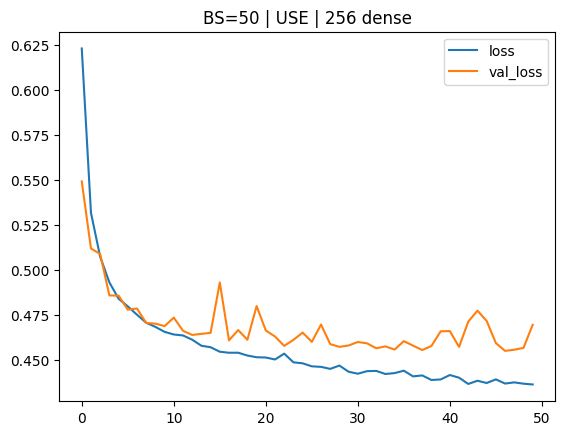

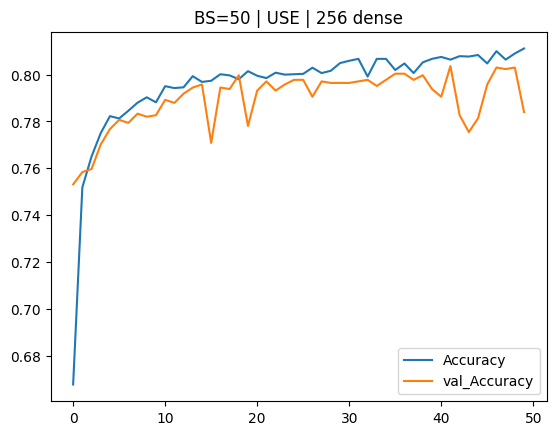

In [26]:
pd.DataFrame(modelhistory.history)[["loss","val_loss"]].plot(title="BS="+ str(BATCHSIZE) +" | USE | 16 GRU")
pd.DataFrame(modelhistory.history)[["Accuracy","val_Accuracy"]].plot(title="BS="+ str(BATCHSIZE) +" | USE | 16 GRU")

<AxesSubplot:title={'center':'BS=50 | USE | 256 dense'}>

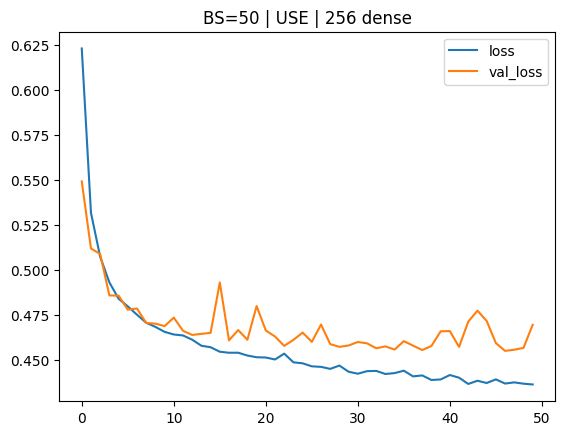

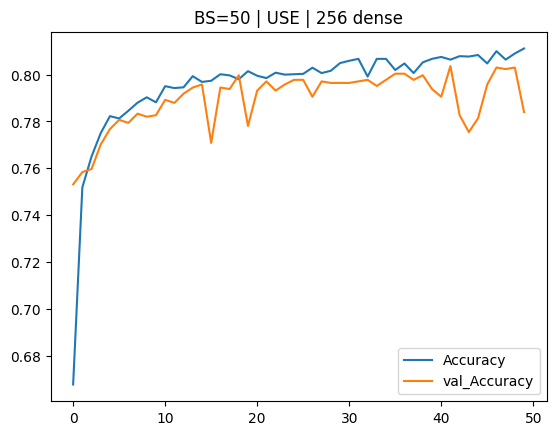

In [26]:
pd.DataFrame(modelhistory.history)[["loss","val_loss"]].plot(title="BS="+ str(BATCHSIZE) +" | USE | 256 dense")
pd.DataFrame(modelhistory.history)[["Accuracy","val_Accuracy"]].plot(title="BS="+ str(BATCHSIZE) +" | USE | 256 dense")

<AxesSubplot:title={'center':'BS=50 | USE | 256 dense'}>

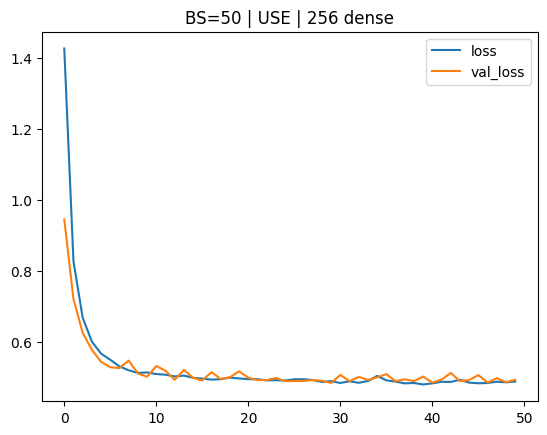

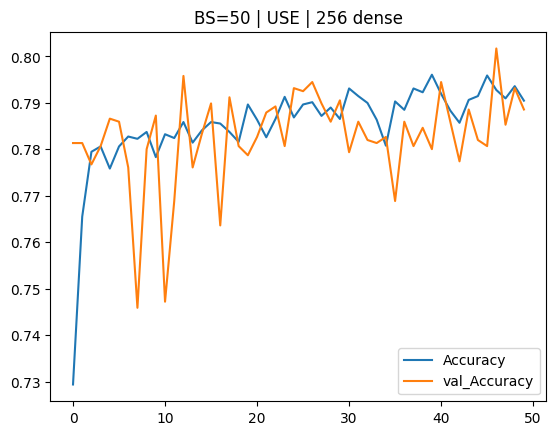

In [19]:
pd.DataFrame(modelhistory.history)[["loss","val_loss"]].plot(title="BS="+ str(BATCHSIZE) +" | USE | 256 dense")
pd.DataFrame(modelhistory.history)[["Accuracy","val_Accuracy"]].plot(title="BS="+ str(BATCHSIZE) +" | USE | 256 dense")